# An Exploration of the San Joaquin County Water Monitoring Dataset

This project (my final project for UC Berkeley ENERES 171, "California Water", Summer 2022) aims to demonstrate both my data-journalism and water analytic skills, in dissecting a large time-diverse dataset of hydrological measurements around the state taken by the California DWR, with particular focus on San Joaquin County, and following the data science lifecycle, its paucity of dioxin data. I intend to expand it later to many more contaminants, of course.

The first 70% or so (by space) of this document is for data cleaning and narrowing down the data, though do not consider this wasted effort; it is a natural part of Exploratory Data Analysis (https://www.epa.gov/caddis-vol4/exploratory-data-analysis), the same process which guided me away from the environmental justice focus that I had at the start of this project. Feel free to skip to the last 30% at the end for more water-theory-related commentary.

Copyright 2022 by Joyee Chen

In [1]:
#standard packages to import, as from my Data 100 class
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#the following code inspired by https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972
import geopandas as gpd
#import descartes as dsc
#import geoplot as gpt
from shapely.geometry import Point, Polygon

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.3-CAPI-1.16.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
#these stations are CA DWR stations for hydrological measurement
#Attribution: taken from https://data.ca.gov/dataset/water-quality-data
stations = pd.read_csv("stations.csv") #note: I uploaded stations.csv into my datahub.berkeley.edu main folder

In [4]:
stations

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,county_name,sample_count,sample_date_min,sample_date_max
0,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,1,06/23/2008 15:00,06/23/2008 15:00
1,6134,01N01E33K001M,01N01E33K001M,01N01E33K001M,Groundwater,37.8868,-121.8682,Contra Costa,1,05/20/1981 13:45,05/20/1981 13:45
2,6135,01N01W03N001M,01N01W03N001M,01N01W03N001M,Groundwater,37.9583,-121.9669,Contra Costa,9,07/23/1974 15:15,08/16/1990 12:15
3,6136,01N01W04A001M,01N01W04A001M,01N01W04A001M,Groundwater,37.9663,-121.9734,Contra Costa,9,08/04/1972 15:00,09/15/1989 08:00
4,6137,01N01W07K001M,01N01W07K001M,01N01W07K001M,Groundwater,37.9460,-122.0155,Contra Costa,9,08/03/1973 09:30,09/15/1989 09:15
...,...,...,...,...,...,...,...,...,...,...,...
44051,6125,HACIENDA TRIB A HACI,HACIENDA TRIB A HACIENDA BLVD,Z8363610,Surface Water,33.9536,-117.9587,Los Angeles,1,05/24/1972 09:00,05/24/1972 09:00
44052,6126,LA MIRADA C 100 FT E,LA MIRADA C 100 FT E/O HACIENDA T,Z8363710,Surface Water,33.9539,-117.9581,Los Angeles,1,05/24/1972 08:30,05/24/1972 08:30
44053,6127,LA MIRADA C TRIB S/O,LA MIRADA C TRIB S/O GOLF CLUB,Z8363910,Surface Water,33.9564,-117.9545,Los Angeles,1,05/24/1972 08:00,05/24/1972 08:00
44054,6128,DISCH/LA MIRADA C-10,DISCH/LA MIRADA C-10 IN DR VALLE,Z8364010,Surface Water,33.9603,-117.9406,Los Angeles,1,05/24/1972 07:30,05/24/1972 07:30


In [5]:
#of course a giant table is quite useless in practice, so we would need to plot them on a map first.
ca_county_map = gpd.read_file('CA_Counties_TIGER2016.shx')

<AxesSubplot:>

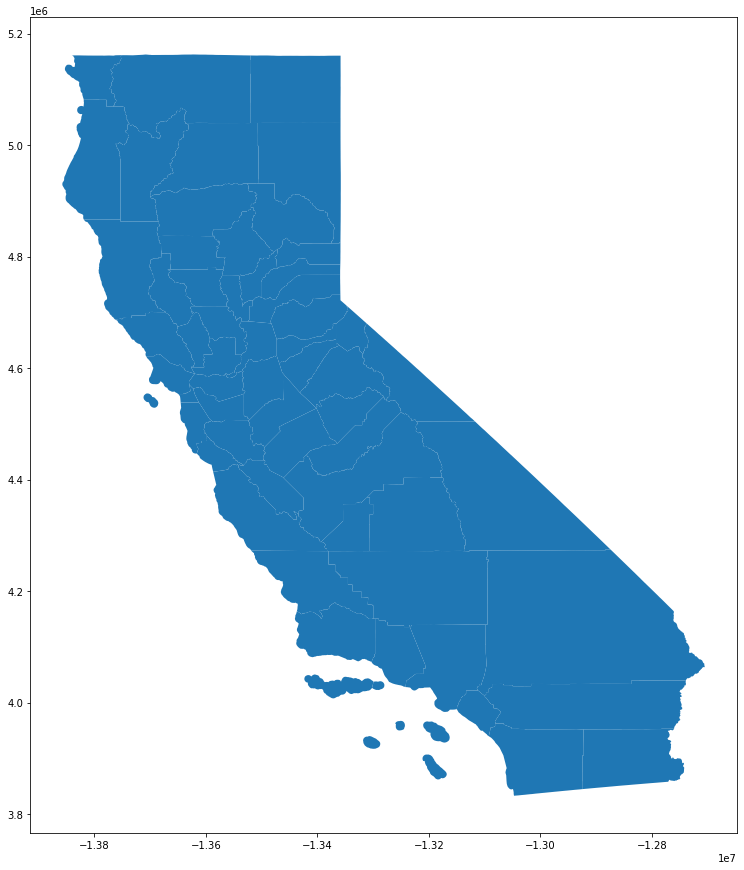

In [6]:
fig, ax = plt.subplots(figsize = (15, 15))
ca_county_map.plot(ax = ax)

In [7]:
crs = {'init': 'epsg:4326'}
geometry = [Point(xy) for xy in zip(stations['longitude'], stations['latitude'])]
geometry[:3]

In [8]:
stations_geo_df = gpd.GeoDataFrame(stations, crs = crs, geometry = geometry)
stations_geo_df

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,county_name,sample_count,sample_date_min,sample_date_max,geometry
0,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,1,06/23/2008 15:00,06/23/2008 15:00,POINT (-121.00000 33.00000)
1,6134,01N01E33K001M,01N01E33K001M,01N01E33K001M,Groundwater,37.8868,-121.8682,Contra Costa,1,05/20/1981 13:45,05/20/1981 13:45,POINT (-121.86820 37.88680)
2,6135,01N01W03N001M,01N01W03N001M,01N01W03N001M,Groundwater,37.9583,-121.9669,Contra Costa,9,07/23/1974 15:15,08/16/1990 12:15,POINT (-121.96690 37.95830)
3,6136,01N01W04A001M,01N01W04A001M,01N01W04A001M,Groundwater,37.9663,-121.9734,Contra Costa,9,08/04/1972 15:00,09/15/1989 08:00,POINT (-121.97340 37.96630)
4,6137,01N01W07K001M,01N01W07K001M,01N01W07K001M,Groundwater,37.9460,-122.0155,Contra Costa,9,08/03/1973 09:30,09/15/1989 09:15,POINT (-122.01550 37.94600)
...,...,...,...,...,...,...,...,...,...,...,...,...
44051,6125,HACIENDA TRIB A HACI,HACIENDA TRIB A HACIENDA BLVD,Z8363610,Surface Water,33.9536,-117.9587,Los Angeles,1,05/24/1972 09:00,05/24/1972 09:00,POINT (-117.95870 33.95360)
44052,6126,LA MIRADA C 100 FT E,LA MIRADA C 100 FT E/O HACIENDA T,Z8363710,Surface Water,33.9539,-117.9581,Los Angeles,1,05/24/1972 08:30,05/24/1972 08:30,POINT (-117.95810 33.95390)
44053,6127,LA MIRADA C TRIB S/O,LA MIRADA C TRIB S/O GOLF CLUB,Z8363910,Surface Water,33.9564,-117.9545,Los Angeles,1,05/24/1972 08:00,05/24/1972 08:00,POINT (-117.95450 33.95640)
44054,6128,DISCH/LA MIRADA C-10,DISCH/LA MIRADA C-10 IN DR VALLE,Z8364010,Surface Water,33.9603,-117.9406,Los Angeles,1,05/24/1972 07:30,05/24/1972 07:30,POINT (-117.94060 33.96030)


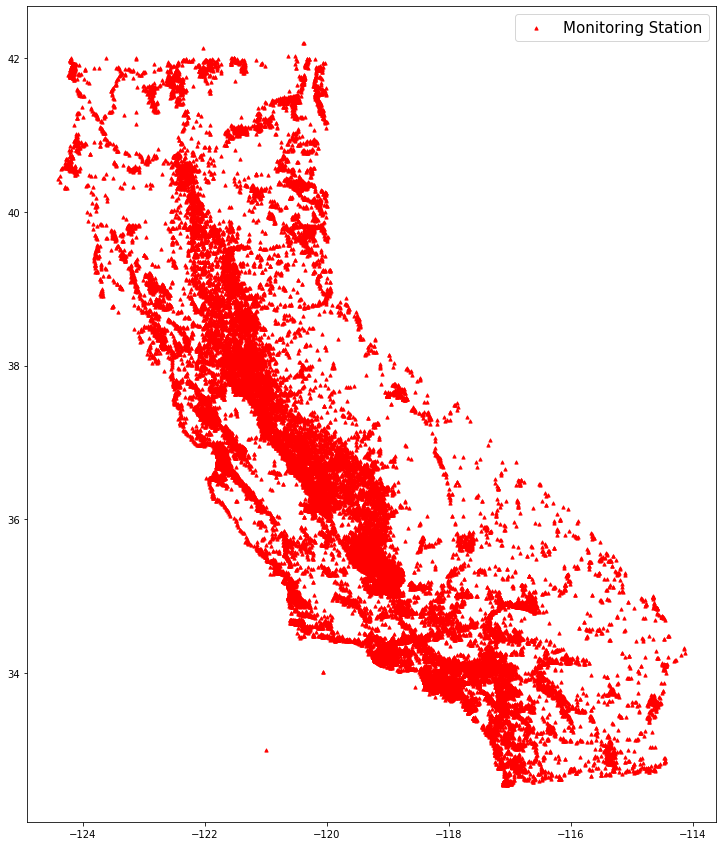

In [9]:
#and here comes the big one:
fig, ax = plt.subplots(figsize = (15, 15))
stations_geo_df.plot(ax = ax, markersize = 10, color = "red", marker = "^", label = "Monitoring Station")
plt.legend(prop = {'size': 15})

In [10]:
#Now what do I actually want to study? The period-of-record dataset is a good place to start.
period_of_record = pd.read_csv("period_of_record.csv")

In [11]:
period_of_record

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,county_name,parameter,sample_count,sample_date_min,sample_date_max
0,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,Dissolved Aluminum,1,06/23/2008 15:00,06/23/2008 15:00
1,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,Dissolved Antimony,1,06/23/2008 15:00,06/23/2008 15:00
2,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,Dissolved Arsenic,1,06/23/2008 15:00,06/23/2008 15:00
3,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,Dissolved Barium,1,06/23/2008 15:00,06/23/2008 15:00
4,47023,Frank Sieferman,Frank Sieferman New Well,01N01E01A001M,Groundwater,33.0000,-121.0000,Yolo,Dissolved Beryllium,1,06/23/2008 15:00,06/23/2008 15:00
...,...,...,...,...,...,...,...,...,...,...,...,...
720245,6131,RIO HONDO R NR DOWNE,RIO HONDO R NR DOWNEY,Z8517000,Surface Water,33.9467,-118.1626,Los Angeles,Total Selenium,1,12/06/1974 00:00,12/06/1974 00:00
720246,6131,RIO HONDO R NR DOWNE,RIO HONDO R NR DOWNEY,Z8517000,Surface Water,33.9467,-118.1626,Los Angeles,Total Silver,1,12/06/1974 00:00,12/06/1974 00:00
720247,6131,RIO HONDO R NR DOWNE,RIO HONDO R NR DOWNEY,Z8517000,Surface Water,33.9467,-118.1626,Los Angeles,Total Zinc,1,12/06/1974 00:00,12/06/1974 00:00
720248,6131,RIO HONDO R NR DOWNE,RIO HONDO R NR DOWNEY,Z8517000,Surface Water,33.9467,-118.1626,Los Angeles,Total ortho-Phosphate,46,02/21/1974 06:45,08/07/1978 05:30


In [12]:
#not too much to see here.
#Let's move on to the lab results file, which is a gigantic file that shows the actual reading results for each location at a specified time and pollutant.
#lab_results = pd.read_csv("lab_results.csv")
#lab_results
#oh wait...lab_results is far more than the 1 GB memory maximum for this notebook.
#So I split it into many small files, one of which is shown below.
lab_results_3 = pd.read_csv("lab_results-3.csv") #limited to 50000 rows of data
lab_results_3

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
0,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,Review Status Unknown,Alameda,DA1005B1305,10/19/2005 06:30,1.0,Meters,"1,1-Dichloropropene",0.0,0.5,ug/L,EPA 502.2
1,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,Review Status Unknown,Alameda,DA1005B1305,10/19/2005 06:30,1.0,Meters,"1,2,3-Trichlorobenzene",0.0,0.5,ug/L,EPA 502.2
2,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,Review Status Unknown,Alameda,DA1005B1305,10/19/2005 06:30,1.0,Meters,"1,2,3-Trichloropropane",0.0,0.5,ug/L,EPA 502.2
3,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,Review Status Unknown,Alameda,DA1005B1305,10/19/2005 06:30,1.0,Meters,"1,2,4-Trichlorobenzene",0.0,0.5,ug/L,EPA 502.2
4,12,H.O. Banks Headworks,Delta P.P. Headworks at H.O. Banks PP,KA000331,Surface Water,37.8019,-121.6203,Review Status Unknown,Alameda,DA1005B1305,10/19/2005 06:30,1.0,Meters,"1,2,4-Trimethylbenzene",0.0,0.5,ug/L,EPA 502.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,35177,19N03E13E001M,19N03E13E001M,19N03E13E001M,Groundwater,39.5059,-121.5936,Review Status Unknown,Butte,WDIS_0709202,10/07/1974 00:00,NaN,Feet,Total Dissolved Solids,310.0,1.0,mg/L at 105 °C,UnkMod TDS
49996,35179,19N03E14C001M,19N03E14C001M,19N03E14C001M,Groundwater,39.5095,-121.6075,Review Status Unknown,Butte,WDIS_0709211,03/11/1981 00:00,NaN,Feet,Conductance,286.0,1.0,uS/cm,EPA 120.1
49997,35179,19N03E14C001M,19N03E14C001M,19N03E14C001M,Groundwater,39.5095,-121.6075,Review Status Unknown,Butte,WDIS_0709211,03/11/1981 00:00,NaN,Feet,Dissolved Calcium,18.0,1.0,mg/L,UnkMod Calcium
49998,35179,19N03E14C001M,19N03E14C001M,19N03E14C001M,Groundwater,39.5095,-121.6075,Review Status Unknown,Butte,WDIS_0709211,03/11/1981 00:00,NaN,Feet,Dissolved Chloride,12.0,1.0,mg/L,UnkMod Chloride


In [13]:
#Let's do some exploratory data analysis to find particularly interesting -- or weird -- trends in the data.
#First figure out what the counties are.
stations['county_name'].unique()

array(['Yolo', 'Contra Costa', 'Humboldt', 'San Bernardino',
       'San Joaquin', 'Riverside', 'Los Angeles', 'Stanislaus',
       'Tuolumne', 'Ventura', 'Mono', 'Inyo', 'Alameda', 'San Francisco',
       'Trinity', 'Orange', 'Santa Barbara', 'Solano', 'Sacramento',
       'Sonoma', 'Marin', 'Calaveras', 'San Mateo', 'Napa', 'Amador',
       'Merced', 'Santa Clara', 'Mariposa', 'San Luis Obispo',
       'San Diego', 'Madera', 'Kern', 'Santa Cruz', 'Sierra', 'Imperial',
       'Fresno', 'Placer', 'Lake', 'Sutter', 'El Dorado', 'Alpine',
       'Monterey', 'San Benito', 'Mendocino', 'Colusa', 'Del Norte',
       'Yuba', 'Tulare', 'Butte', 'Nevada', 'Kings', 'Glenn', 'Lassen',
       'Plumas', 'Tehama', 'Shasta', 'Modoc', 'Siskiyou', 'Oregon',
       'Arizona 1', 'Arizona 2'], dtype=object)

In [14]:
#first let's be clear about exactly what types of stations there are:
print(stations_geo_df['station_type'].unique())
#Then let's divide up the dataset into ground and surface water sets because there's a great physical distinction between the two.
groundwater = stations_geo_df[stations_geo_df['station_type'] == 'Groundwater']
surface_water = stations_geo_df[stations_geo_df['station_type'] == 'Surface Water']
other = stations_geo_df[stations_geo_df['station_type'] == 'Other']

['Groundwater' 'Other' 'Surface Water']


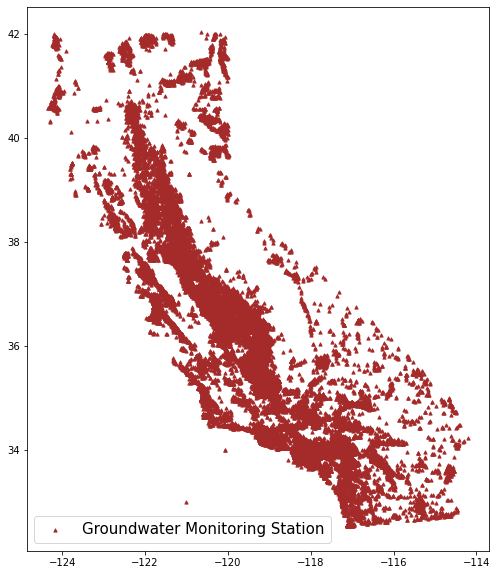

In [15]:
#I personally want to rush to analyze at the county level right away, but let's see if there are any trends at the state level first:
#For groundwater:
fig, ax = plt.subplots(figsize = (10, 10))
#stations.plot(ax = ax, alpha = 0.4, color = "grey")
groundwater.plot(ax = ax, markersize = 10, color = "brown", marker = "^", label = "Groundwater Monitoring Station")
plt.legend(prop = {'size': 15})

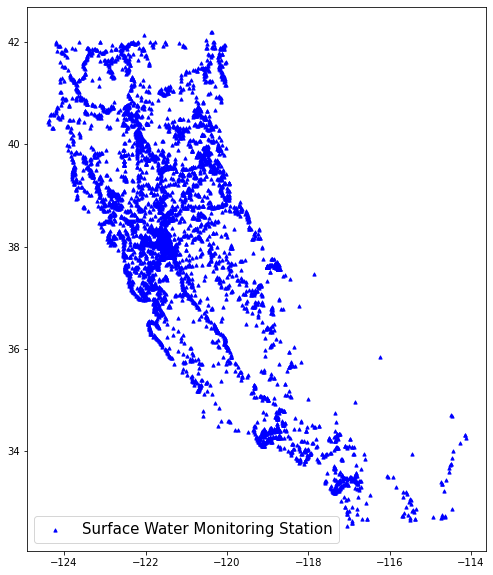

In [16]:
#We immediately see that groundwater monitoring is primarily for the California Delta, and far less in the mountains. 
#For surface water:
fig, ax = plt.subplots(figsize = (10, 10))
#stations.plot(ax = ax, alpha = 0.4, color = "grey")
surface_water.plot(ax = ax, markersize = 10, color = "blue", marker = "^", label = "Surface Water Monitoring Station")
plt.legend(prop = {'size': 15})


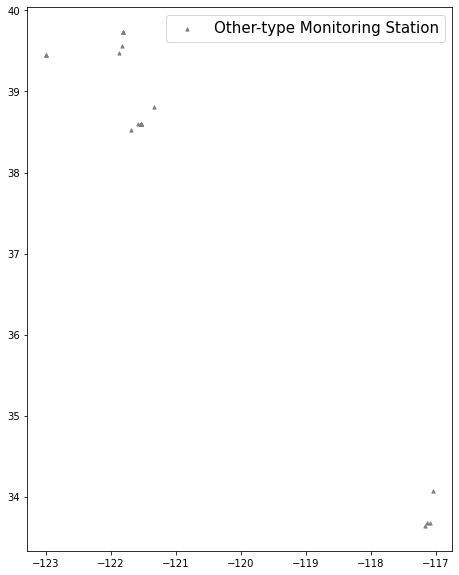

In [17]:
#Naturally, the surface water monitoring sites seem to be concentrated along riverine paths. 
#Just for posterity, let's plot the "other" category:
fig, ax = plt.subplots(figsize = (10, 10))
#stations.plot(ax = ax, alpha = 0.4, color = "grey")
other.plot(ax = ax, markersize = 10, color = "grey", marker = "^", label = "Other-type Monitoring Station")
plt.legend(prop = {'size': 15})

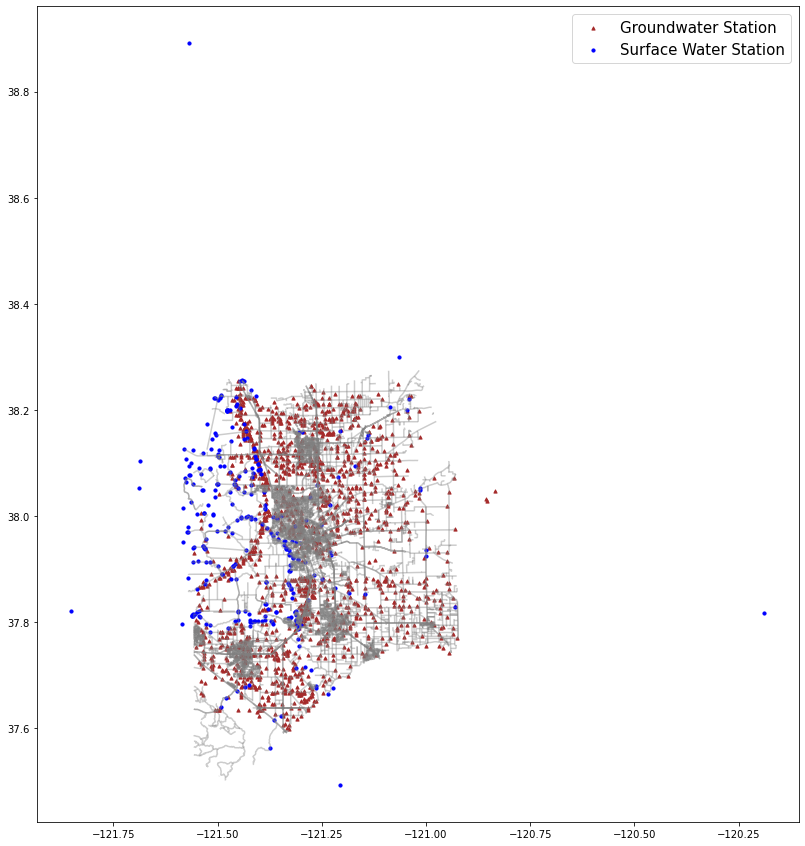

In [18]:
#Too few other-type stations to worry about. 
#Let's also find out what pollutants are involved. 

#But there's a big problem: the pollutants data is in the various lab_results dataframes, of which
#there are more than 50 across all California counties, far too big to fit into the measly school provided datahub 
#software. 

#So let's focus on analyzing the water situation in particular counties first.
#Since CA is the third largest state in the Union, it suffices to choose a county at random:
#np.random.choice(stations['county_name'].unique())
#which came out to San Joaquin County.
#The following code shows a distribution of groundwater and surface-water stations throughout that county, imprinted upon its road structure:
san_joaquin_groundwater = groundwater[groundwater['county_name'] == 'San Joaquin']
san_joaquin_surface_water = surface_water[surface_water['county_name'] == 'San Joaquin']
san_joaquin_roads = gpd.read_file("tl_2021_06077_roads.shx")
fig, ax = plt.subplots(figsize = (15,15))
san_joaquin_roads.plot(ax=ax, alpha = 0.4, color = "grey")
san_joaquin_groundwater.plot(ax = ax, markersize = 10, color = 'brown', marker = "^", label = "Groundwater Station")
san_joaquin_surface_water.plot(ax = ax, markersize = 10, color = 'blue', marker = "o", label = "Surface Water Station")
plt.legend(prop = {'size':15})
#Attribution of the data san_joaquin_roads to the source https://catalog.data.gov/dataset/tiger-line-shapefile-current-county-san-joaquin-county-ca-all-roads

In [19]:
#We can see that the surface water sites are present in the west county and groundwater sites sprinkled throughout. 
#Now we analyze the pollutants data directly, which involves joining several files.
lab_results_63 = pd.read_csv("lab_results-63.csv")
lab_results_64 = pd.read_csv("lab_results-64.csv")
lab_results_65 = pd.read_csv("lab_results-65.csv")
lab_results_66 = pd.read_csv("lab_results-66.csv")
lab_results_67 = pd.read_csv("lab_results-67.csv")
lab_results_68 = pd.read_csv("lab_results-68.csv")
#Attribution: all the lab_results csv files come from https://data.ca.gov/dataset/water-quality-data, the same site as the statewide stations data.
san_joaquin_lab_results = pd.concat([lab_results_63, lab_results_64, lab_results_65, lab_results_66, lab_results_67, lab_results_68], axis=0)
#Then eliminate the irrelevant entries.
san_joaquin_lab_results = san_joaquin_lab_results[san_joaquin_lab_results['county_name'] == 'San Joaquin']
san_joaquin_lab_results

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
32472,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716853,06/14/1979 09:45,NaN,Feet,Conductance,1280.0,1.0,uS/cm,EPA 120.1
32473,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716853,06/14/1979 09:45,NaN,Feet,Dissolved Boron,1.4,0.1,mg/L,"Std Method 4500-B, C"
32474,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716853,06/14/1979 09:45,NaN,Feet,Dissolved Calcium,45.0,1.0,mg/L,EPA 215.1
32475,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716853,06/14/1979 09:45,NaN,Feet,Dissolved Chloride,170.0,0.1,mg/L,"Std Method 4500-Cl, B"
32476,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716853,06/14/1979 09:45,NaN,Feet,Dissolved Hardness,219.0,1.0,mg/L as CaCO3,Std Method 2340 B (D)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39685,47368,TD VNS7027,VNS 7027,VNS7027,Other,NaN,NaN,Review Status Unknown,San Joaquin,FWA0512B10217,05/16/2012 11:45,NaN,Meters,Dissolved Sulfate,449.0,15.0,mg/L,EPA 300.0 28d Hold
39686,47368,TD VNS7027,VNS 7027,VNS7027,Other,NaN,NaN,Review Status Unknown,San Joaquin,FWA0512B10217,05/16/2012 11:45,NaN,Meters,Specific Conductance,2371.0,1.0,uS/cm@25 °C,Std Method 2510-B (Filtered)
39687,47368,TD VNS7027,VNS 7027,VNS7027,Other,NaN,NaN,Review Status Unknown,San Joaquin,FWA0512B10217,05/16/2012 11:45,NaN,Meters,Total Alkalinity,297.0,1.0,mg/L as CaCO3,Std Method 2320 B (Filtered)
39688,47368,TD VNS7027,VNS 7027,VNS7027,Other,NaN,NaN,Review Status Unknown,San Joaquin,FWA0512B10217,05/16/2012 11:45,NaN,Meters,Total Dissolved Solids,1570.0,1.0,mg/L,Std Method 2540 C


In [20]:
#What types of contaminants are tested for?
list_of_contaminants = san_joaquin_lab_results['parameter'].unique()
list_of_contaminants

array(['Conductance', 'Dissolved Boron', 'Dissolved Calcium',
       'Dissolved Chloride', 'Dissolved Hardness', 'Dissolved Magnesium',
       'Dissolved Potassium', 'Dissolved Sodium', 'Dissolved Sulfate',
       'Total Alkalinity', 'Total Dissolved Solids', 'pH',
       'Dissolved Nitrate', 'Total Hardness',
       '*No Lab Analyses (Field Measures Only)', 'Dissolved Fluoride',
       'Dissolved Silica (SiO2)', 'Total Arsenic', 'Dissolved Arsenic',
       'Dissolved Manganese', 'Total Copper', 'Total Iron',
       'Total Manganese', 'Total Zinc', 'Total Lithium',
       'Total Strontium', 'Color', 'Dissolved Iodide',
       'Methylene Blue Active Substances (MBAS)', 'Threshold Odor',
       'Total Barium', 'Total Cadmium', 'Total Chromium', 'Total Lead',
       'Total Mercury', 'Total Selenium', 'Total Silver',
       'Total Chromium, hexavalent (Cr6+)', 'Dissolved Iron', 'Turbidity',
       'Specific Conductance', 'Dissolved Aluminum', 'Dissolved Antimony',
       'Dissolved Barium'

In [21]:
#Surely that is an overwhelming list; let's split up the lab results dataset into groundwater and surface water sections to make it a bit more manageable.
#On second thought, no...it would take up too much memory (more than 99% of the 1GB I have available). But the code is below for posterity.
#sj_lab_results_groundwater = san_joaquin_lab_results[san_joaquin_lab_results['station_type'] == 'Groundwater']
#sj_lab_results_surface_water = san_joaquin_lab_results[san_joaquin_lab_results['station_type'] == 'Surface Water']

In [22]:
#A great feature of exploratory data analysis is, how can we find truly interesting trends or outliers worth investigating?
#Choosing a contaminant at random:
#np.random.choice(list_of_contaminants)
#gives us the intimidating-sounding '2,3,7,8-Tetrachlorodibenzo-p-dioxin'.

Some facts about that toxin: according to the NIH, it is more commonly known as dioxin/TCDD, and at "lesser amounts can affect reproduction, cause birth defects, damage the liver and suppress the immune system" of humans and other mammals alike, not to mention cancer linkages. In addition, the EPA notes that dioxins are particularly agile in their creation and propagation through the land, air, and water: they are crystalline in pure form but are typically mixed into sediment invisibly to the eye. While humans have passed legislation severely curtailing its industrial production, dioxins are still "a contaminant formed during the production of some chlorinated organic compounds, including a few herbicides such as Silvex", but their real menace lies in being "extremely persistent compounds (that) break down very slowly". In particular, the EPA identifies three mechanisms by which dioxins enter surface or ground water: 
* People setting fires or flames and thus releasing dioxin particles into air that gets deposited into water nearby
* Being deposited from air into soils, and then soils eroding into water supply
* Chemical factories discharging it directly into water

Attributions: https://pubchem.ncbi.nlm.nih.gov/compound/2_3_7_8-Tetrachlorodibenzo-P-dioxin and https://www.epa.gov/dioxin/learn-about-dioxin

In [23]:
#Our goal in this cell is to find the sites in the 90th percentile and above for '2,3,7,8-Tetrachlorodibenzo-p-dioxin'
#as a preliminary step to mapping where those sites are.

sj_lab_results_dioxin = san_joaquin_lab_results[san_joaquin_lab_results['parameter'] == '2,3,7,8-Tetrachlorodibenzo-p-dioxin']
sj_lab_results_dioxin

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
12913,154,OR@Bacon Is,Old River at Bacon Island,B9D75811344,Surface Water,37.9694,-121.5722,Review Status Unknown,San Joaquin,C0396A0420,03/13/1996 11:40,1.0,Meters,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",0.0,4.0,pg/L,EPA 1613 A
15261,154,OR@Bacon Is,Old River at Bacon Island,B9D75811344,Surface Water,37.9694,-121.5722,Review Status Unknown,San Joaquin,C0696A1286,06/12/1996 10:00,1.0,Meters,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",0.0,3.1,pg/L,EPA 1613 A
17498,154,OR@Bacon Is,Old River at Bacon Island,B9D75811344,Surface Water,37.9694,-121.5722,Review Status Unknown,San Joaquin,C0996A1845,09/11/1996 10:00,1.0,Meters,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",0.0,1.3,pg/L,EPA 1613 A
19492,154,OR@Bacon Is,Old River at Bacon Island,B9D75811344,Surface Water,37.9694,-121.5722,Review Status Unknown,San Joaquin,C1295A3054,12/06/1995 11:41,1.0,Meters,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",0.0,2.1,pg/L,EPA 1613 A
19754,154,OR@Bacon Is,Old River at Bacon Island,B9D75811344,Surface Water,37.9694,-121.5722,Review Status Unknown,San Joaquin,C1296A2333,12/11/1996 13:25,1.0,Meters,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",0.0,1.6,pg/L,EPA 1613 A


I have to admit my surprise at having just a single location and just five data entries reporting dioxins. Why might that be? And an equally important question, why did dioxin measurement stop after 1996? 

On both questions information is generally patchy. The most complete account seems to be a 2004 paper by two research engineers from the Central Valley engineering firm of G. Fred Lee and Associates [1], whose date of publication gives us a good window into the thinking at the time the dioxin measurements ceased.

* They claim that "organochlorine compounds" like dioxins were banned 20 years before the paper was written, which indirectly may contribute to a false sense of security that motivated the 1996 test-ceasing, adding to the effect of the five 0.0 results from our dataset itself.
* More interestingly, though, they assert that "Stockton Deep Water Channel, Upper (Port Turning Basin) is listed for dioxins from a point source". Given the Delta map that the paper provided on page 2, the turning basin is in the city of Stockton proper, some 10 miles upstream from Bacon Island, which is actually a few miles orthogonal to the Channel. That orthogonality or asideness may blunten the effects of the point source dioxination, making the problem (and the many 0.0 readings here) less severe than if monitoring stations were put closer to town. But this is still a bit naive for some reason -- why would the state leave so much up to a single station?
* On page 4 the authors admit that the problem of *bioaccumulation* of "organochlorine legacy pesticides, PCBs and dioxins" is no less than "one of the most significant water quality problems of the Delta and its nearby associated tributaries." The authors immediately strike at the heart of our question: "While CALFED...has been devoting considerable funds to addressing the *mercury* excessive bioaccumulation problem in the Delta and its tributaries... *no funds* have been made available by CALFED/CBDA to begin to address the excessive bioaccumulation of the *organochlorine* hazardous chemicals in [the same] fish" (emphasis mine). Budgetary constraints such as this are understandable when implying the undermanning of the San Joaquin dioxin monitoring system that we see in our dataset. (Think of the attitude of mind in Lassiter's revelation [2] that across large swathes of California, "regulators agreed that...they were limited by funding and staff time [to] prioritize [enforcing] violations of Tier 1 contaminants [those with acute or immediate health impacts] over a system's failure to comply with the SDWA's monitoring requirements" (pp 257-8).)
* Just as intriguing is the authors' hypothesis that the reason for the imbalance in funding might have been because the anti-mercury cause had friends in high places: that funding for the mercury remediation problem is tied to known concerns raised by another CALFED program, to restore ecosystems in the Delta whose shallow-water nature encourages mercury-toxifying bacteria (pg. 4-5), while the problem of dioxin compounds seems less straightforwardly solved in comparison. 

A second source, a 2012 report [3] of the San Francisco Estuary Institute, admitted that 
* "the most toxic tetrachlorinated dioxins were not detected; had they been detected we would have expected to see them at very low concentrations only..."
* "these concentrations were much lower than dioxin and furan congener concentrations reported for other mixed land use watershed..."
* "Normalized to watershed size, these loads are 10 times lower than loads reported from other watersheds with known point sources such as a pulp and paper mill discharge"

So it seems to affirm the hypothesis of lack of severity of dioxins [contributing to their nonmeasurement after the 1990s] more than the lack of state resources hypothesis, though the former might lead to the latter, in so many cases of slow-moving disasters leading to, and a part of, our current climate crisis. 

Attributions: 
* [1] http://www.gfredlee.com/SJR-Delta/Delta-WQ-IssuesRpt.pdf
* [2] Lassiter. (2015). Sustainable water : challenges and solutions from California (First edition.). University of California Press. https://doi.org/10.1525/j.ctv1xxsb4
* [3] https://www.sfei.org/sites/default/files/biblio_files/681%20David%20et%20al_120216.pdf

In [24]:
#Now let's see what other interesting stories can be gleaned from our dataset.
#Pick one of the many interesting toxins that the ingenuity of evolved apes with large gray matter
#concentrations managed to create:
#np.random.choice(list_of_contaminants)
#The code manages to output 'Dissolved Fluoride'.
#Let's see what data it corresponds to:
sj_lab_results_dissolved_fluoride = san_joaquin_lab_results[san_joaquin_lab_results['parameter'] == 'Dissolved Fluoride']
sj_lab_results_dissolved_fluoride

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
32527,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716842,07/07/1954 09:50,NaN,Feet,Dissolved Fluoride,0.0,0.1,mg/L,UnkH Fluoride
32567,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716845,07/20/1962 13:45,NaN,Feet,Dissolved Fluoride,0.1,0.1,mg/L,Std Method 10th Ed Fluororide
32582,6227,01N04E03N001M,01N04E03N001M,01N04E03N001M,Groundwater,37.9555,-121.5297,Review Status Unknown,San Joaquin,WDIS_0716844,07/26/1961 14:30,NaN,Feet,Dissolved Fluoride,0.2,0.1,mg/L,Std Method 10th Ed Fluororide
32635,6231,01N04E15F001M,01N04E15F001M,01N04E15F001M,Groundwater,37.9338,-121.5251,Review Status Unknown,San Joaquin,WDIS_0716860,07/02/1954 00:00,NaN,Feet,Dissolved Fluoride,0.0,0.1,mg/L,UnkH Fluoride
32650,6232,01N04E17K001M,01N04E17K001M,01N04E17K001M,Groundwater,37.9302,-121.5571,Review Status Unknown,San Joaquin,WDIS_0716862,07/02/1954 00:00,NaN,Feet,Dissolved Fluoride,0.2,0.1,mg/L,UnkH Fluoride
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16988,45952,MD7A,MD7A - Little Potato Slough @ Terminous,B9S80681299,Surface Water,38.1138,-121.4980,Review Status Unknown,San Joaquin,WDIS_0325199,11/21/1955 13:30,NaN,Feet,Dissolved Fluoride,0.3,0.1,mg/L,UnkH Fluoride
17072,45952,MD7A,MD7A - Little Potato Slough @ Terminous,B9S80681299,Surface Water,38.1138,-121.4980,Review Status Unknown,San Joaquin,WDIS_0325188,12/10/1954 14:45,NaN,Feet,Dissolved Fluoride,0.5,0.1,mg/L,UnkH Fluoride
17112,45952,MD7A,MD7A - Little Potato Slough @ Terminous,B9S80681299,Surface Water,38.1138,-121.4980,Review Status Unknown,San Joaquin,WDIS_0909813,12/14/1956 10:25,NaN,Feet,Dissolved Fluoride,0.2,0.1,mg/L,UnkMod Fluoride
17145,45952,MD7A,MD7A - Little Potato Slough @ Terminous,B9S80681299,Surface Water,38.1138,-121.4980,Review Status Unknown,San Joaquin,WDIS_0909801,12/20/1955 08:50,NaN,Feet,Dissolved Fluoride,0.5,0.1,mg/L,UnkH Fluoride


It is quite impressive how we have more than 2200 data entries for dissolved fluoride. But where does the data come from? Let us plot where on the map those dissolved fluoride stations are:

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


<AxesSubplot:>

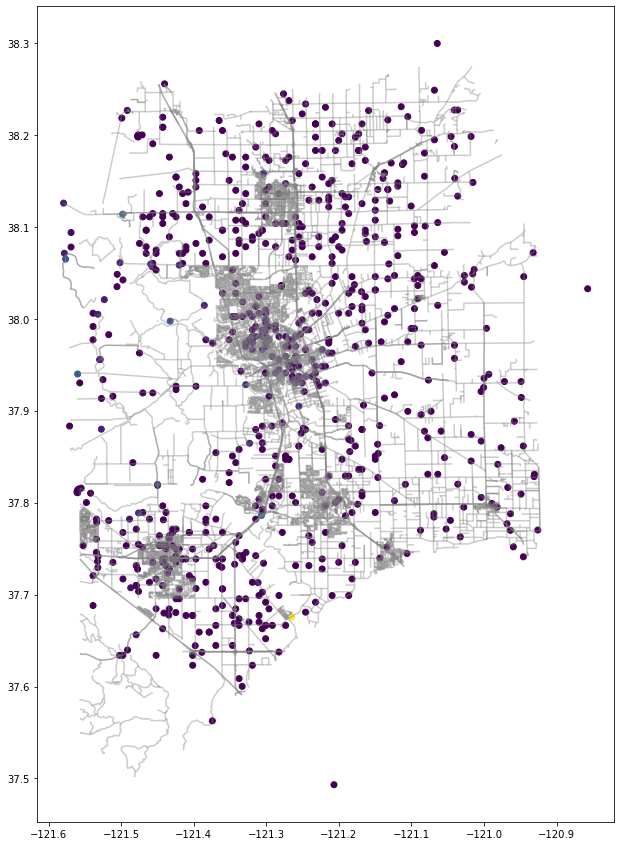

In [25]:
#We have to rely on the period_of_record dataset we introduced at the beginning of the project.
sj_period_of_record = period_of_record[period_of_record['county_name'] =='San Joaquin']
sj_dissolved_fluoride_sites = sj_period_of_record[sj_period_of_record['parameter'] == 'Dissolved Fluoride']
#some necessary cleanup to make the dataset plottable:
geometry = [Point(xy) for xy in zip(sj_dissolved_fluoride_sites['longitude'], sj_dissolved_fluoride_sites['latitude'])]
sj_dissolved_fluoride_sites = gpd.GeoDataFrame(sj_dissolved_fluoride_sites, crs = crs, geometry = geometry)
#And then plot them as a sort of heatmap (more precisely, a choropleth) on the map:
fig, ax = plt.subplots(figsize = (15, 15))
san_joaquin_roads.plot(ax = ax, alpha = 0.4, color = 'grey')
sj_dissolved_fluoride_sites.plot(column = 'sample_count', ax = ax)
#gpt.choropleth(sj_dissolved_fluoride_sites, hue = sj_dissolved_fluoride_sites['sample_count'])

Regrettably, software glitches on my end prevented me from plotting the count/frequency of samples at each site. More importantly, though, can we find out where a *troublesome* amount of fluoride exists?
According to the EPA [1], the maximum naturally occuring fluoride levels are set at 4.0 mg/L so we shall filter out sites that have less than that.

[1] https://www.epa.gov/sites/default/files/2015-10/documents/2011_fluoride_questionsanswers.pdf

In [28]:
sj_too_much_fluoride = sj_lab_results_dissolved_fluoride[sj_lab_results_dissolved_fluoride['result'] > 4.0]
sj_too_much_fluoride

,station_id,station_name,full_station_name,station_number,station_type,latitude,longitude,status,county_name,sample_code,sample_date,sample_depth,sample_depth_units,parameter,result,reporting_limit,units,method_name
31186,16889,04S06E05Q001M,04S06E05Q001M,04S06E05Q001M,Groundwater,37.6086,-121.3375,Review Status Unknown,San Joaquin,WDIS_0722333,08/08/1948 00:00,NaN,Feet,Dissolved Fluoride,16.0,0.1,mg/L,UnkH Fluoride


Thankfully just one observation came back with too much fluoride, and it from 1948, far before the modern era, so no issues on that front.

As students, staff, and members of the wider Californian community, how can we engage more deeply in the issues just presented? The dioxins issue as portrayed in this project seemed physically distant, just dots on a computer screen. But getting familiar with the nuances of how pollutant data is measured, and where it is lacking, may be considered the first step to engagement. Some future steps may include lobbying state and federal leaders to expand funding for dioxin measurement at more sites, or encouraging universities to spearhead the same.

In [26]:
#A future cell: How can we connect this map to issues of socioeconomic class? 